# **Basic Libraries & Dataset**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Load and prepare data
df = pd.read_csv('exchange_rate.csv', parse_dates=[0])
df.columns = ['date', 'Ex_rate']
df.set_index('date', inplace=True)

In [31]:
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


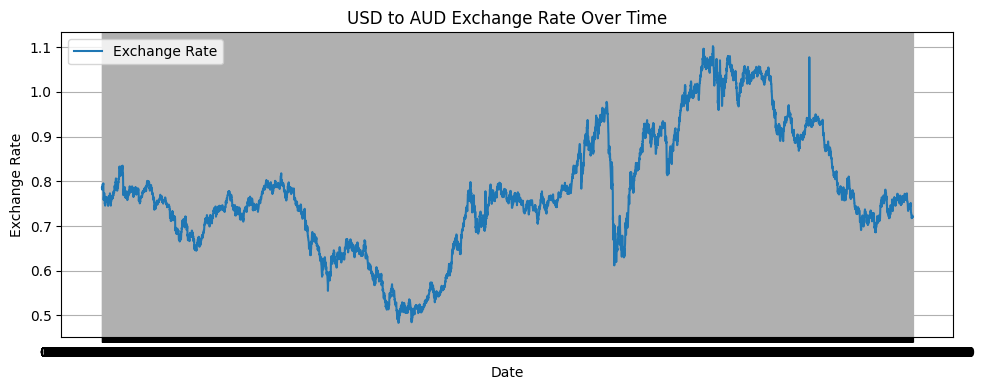

In [32]:
# Plot the original series
plt.figure(figsize=(10, 4))
plt.plot(df, label='Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **ADF Test**

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:

result = adfuller(df['Ex_rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477


In [35]:

# Differencing if non-stationary
df_diff = df.diff().dropna()

# Visulization

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

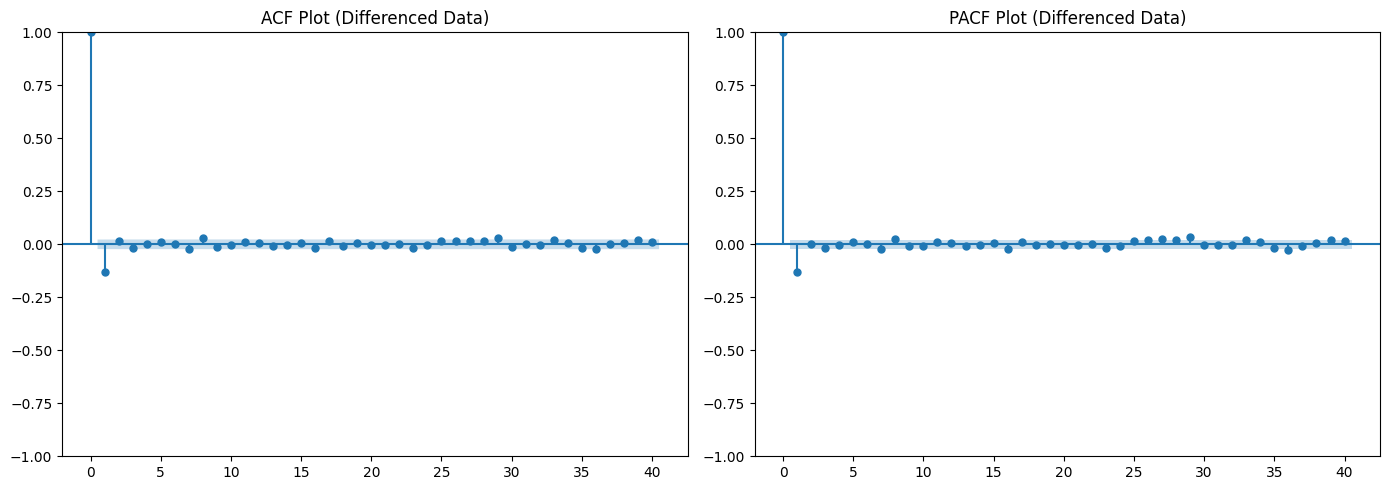

In [37]:
# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df_diff, lags=40, ax=axes[0])
plot_pacf(df_diff, lags=40, ax=axes[1], method='ywm')
axes[0].set_title('ACF Plot (Differenced Data)')
axes[1].set_title('PACF Plot (Differenced Data)')
plt.tight_layout()
plt.show()

# Splitting

In [38]:
train = df.iloc[:-1500]
test = df.iloc[-1500:]

# **Arima Model building**

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
# ARIMA Model (example params: p=1, d=1, q=1)
arima_model = ARIMA(train, order=(1, 1, 1))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

# **Exponential Smoothing Model**

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
es_model = ExponentialSmoothing(train, trend='add', seasonal=None)
es_result = es_model.fit()
es_forecast = es_result.forecast(steps=1500)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


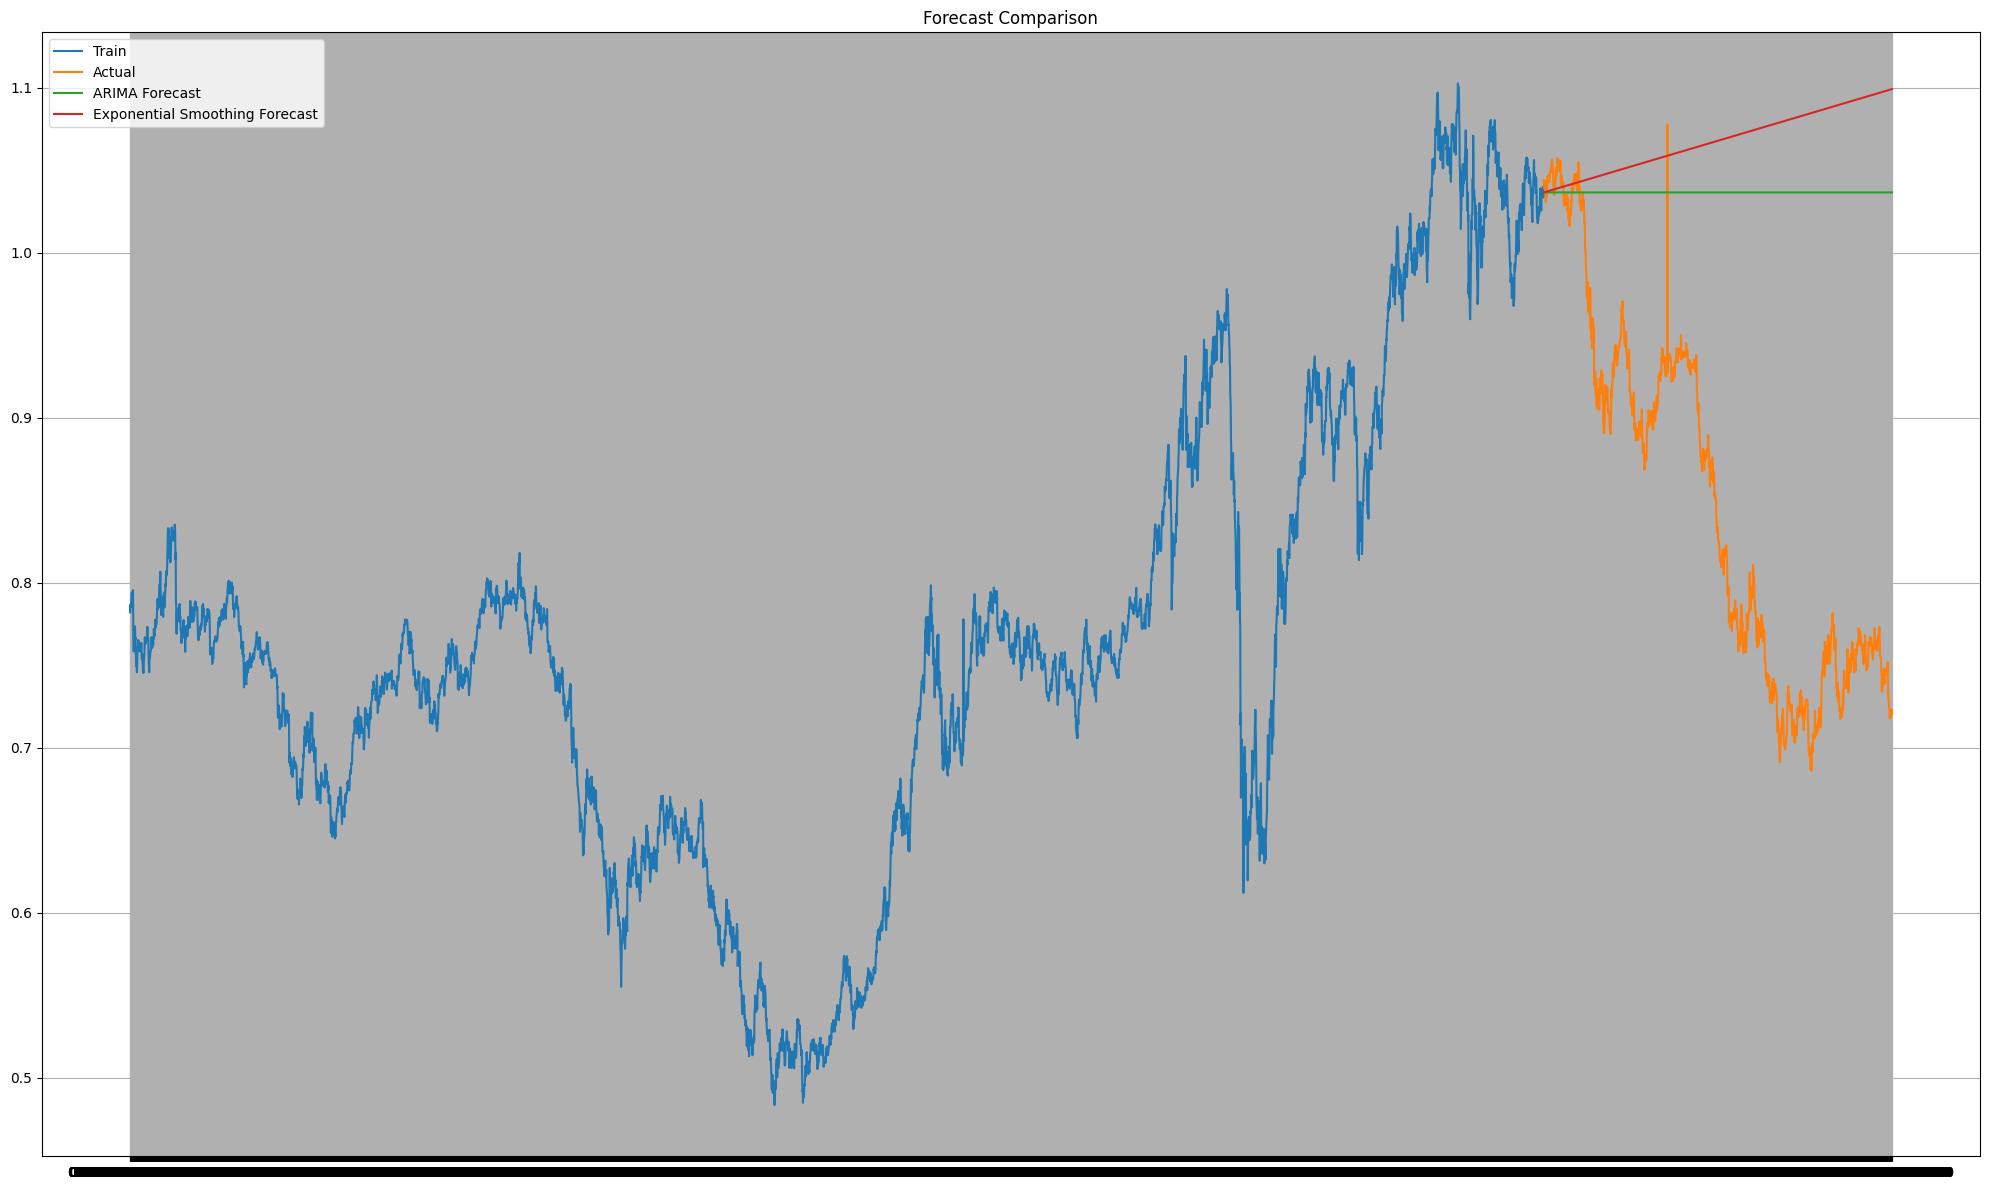

In [47]:
# Plot forecasts
plt.figure(figsize=(20, 12))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test.index, es_forecast, label='Exponential Smoothing Forecast')
plt.legend()
plt.title('Forecast Comparison')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Evaluation**

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
def evaluate_forecast(true, pred, name):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    print(f'{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%')

evaluate_forecast(test['Ex_rate'], arima_forecast, 'ARIMA')
evaluate_forecast(test['Ex_rate'], es_forecast, 'Exponential Smoothing')

ARIMA - MAE: 0.1901, RMSE: 0.2177, MAPE: nan%
Exponential Smoothing - MAE: 0.2210, RMSE: 0.2532, MAPE: nan%
